# Localization

Use "localization" to learn a Cahn-Hilliard model.


## Learn a Cahn-Hilliard

Square domain periodic boundary conditions

## $$ \dot{\phi} = \nabla^2 \left( \phi^3 - \phi \right) - \gamma \nabla^4 \phi $$

Create a mapping from $t_0$ to $t_{10}$ without doing all the steps. We want to do the following.

## $$ \phi[s; t_0] \rightarrow \phi[s; t_{10}] $$

## Represent $\phi$ as a microstructure function

### $$ \phi_j(\vec{r}) = \int_H h \; m_j(h; \vec{r}) \; dh $$

### $$ \int_H m_j(h; \vec{r}) \; dh = 1 $$

### $$ m_j(h, \vec{r}) = \delta(h - \phi_j(\vec{r})) $$ 

Can think of $\phi_j$ as the expectation of the microstructure function and $m_j$ as a probability density function. In our Cahn-Hilliard, $ -1 < \phi_j[s] < 1 $.

### $$ \phi_j [s] = \sum_{h \in H} h \; m_j [ h; s] $$

Now, we define 

### $$ m_j [h; s] = \delta [ h - \phi_j[s] ] $$

where

### $$ \delta [x] = \max \left( 1 - \left|\frac{x}{\Delta h}\right|, 0 \right) $$



[ 0.   0.   0.4  0.6  0. ]


/home/wd15/miniconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


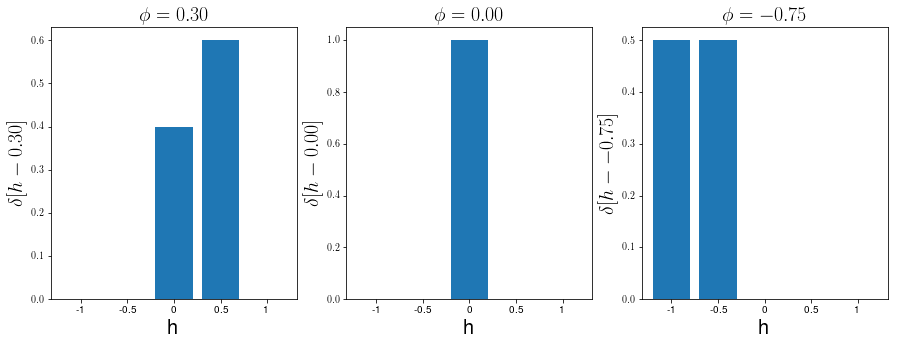

In [50]:
%matplotlib inline 

def delta_func(x, dh):
    return np.maximum(1 - abs(x) / dh, 0)

hs = np.array([-1., -0.5, 0, 0.5, 1])

phi = 0.3

import matplotlib.pyplot as plt
print(delta_func(hs - phi, 0.5))
f, axs = plt.subplots(1, 3)
f.set_size_inches((15, 5))

for ax, phi in zip(axs, [0.3, 0.0, -0.75]):
    ax.bar(np.arange(len(hs)), delta_func(hs - phi, 0.5))
    ax.set_xticklabels(['', '-1', '-0.5', '0', '0.5', '1'])
    ax.set_ylabel('$\delta[h - {0:.2f}]$'.format(phi), fontsize=20)
    ax.set_xlabel('h', fontsize=20)
    ax.set_title('$\phi={0:.2f}$'.format(phi), fontsize=20)
f.show()

    

In [52]:
from pymks.bases import PrimitiveBasis

microstructure = np.array([[0.3]])

basis = PrimitiveBasis(n_states=5, domain=[-1, 1])

basis.discretize(microstructure)

array([[[ 0. ,  0. ,  0.4,  0.6,  0. ]]])

In [55]:
basis.discretize(np.array([[0.0]]))

array([[[ 0.,  0.,  1.,  0.,  0.]]])

In [56]:
basis.discretize(np.array([[-0.75]]))

array([[[ 0.5,  0.5,  0. ,  0. ,  0. ]]])

## Localization

Use regression for each local state.

# $$ p_j[s] = \sum_{r \in S} \sum_{h \in H} \alpha[s; h] m_j[s + r; h] $$